In [48]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
from shapely.geometry import Polygon

In [686]:
def hexgrid(cdmx,d): 
    
    xmin=cdmx.bounds.minx.iloc[0]
    xmax=cdmx.bounds.maxx.iloc[0]

    ymin=cdmx.bounds.miny.iloc[0]
    ymax=cdmx.bounds.maxy.iloc[0]
    
    pi=(2*np.pi)/6
    
    pol=[]

    cy=1

    yy=ymax-cy*d+2*d

    yma=[]
    ymi=[]

    ss=0

    while yy>ymin-5*d:

        cx=1
        xx=xmin+cx*d-3*d

        xma=[]
        xmi=[]

        cc=0

        yy=ymax-cy*d+2*d

        while xx<xmax+2*d:

            hx=[]
            xx=xmin+cx*d-2*d

            if cy%2==0:
                f=0
            else:
                f=d/2*np.sin(pi)-d/2*np.sin(0)

            for i in range(6):

                    if i==0:
                        yma.append(d/2*np.cos(pi*i)+yy)

                    if i==1:
                        xma.append(d/2*np.sin(pi*i)+xx)
                        ymi.append(d/2*np.cos(pi*i)+yy)

                    if i==4:
                        xmi.append(d/2*np.sin(pi*i)+xx)


                    if i==5:
                        if cc==0:
                            e=0
                        else:
                            e=xmi[cc]-xma[cc-1]

                    if ss!=0 and cy==2:
                        e2=yma[ss]-ymi[ss-1]
                    elif ss==0 and cy==1:
                        e2=0

                    hx.append([d/2*np.sin(pi*i)+xx+f,d/2*np.cos(pi*i)+yy+ss*e2])

            xma[cc]=xma[cc]-e
            xmi[cc]=xmi[cc]-e

            for i in hx:
                for j in range(1):
                    i[j]=i[j]-e

            pol.append(Polygon(hx))

            cx+=1
            cc+=1

        cy+=1
        ss+=1

    return gpd.overlay(gpd.GeoDataFrame(geometry=pol), cdmx, how='intersection')['geometry']

In [431]:
mx=gpd.read_file("/Users/Raul/Desktop/Programacion/Python/Covid/dest2018gw/dest2018gw.shp")

In [662]:
cdmx=mx[mx.CVE_ENT=='09'].to_crs({'init': 'epsg:32614'})
son=mx[mx.CVE_ENT=='26'].to_crs({'init': 'epsg:32614'})
nl=mx[mx.CVE_ENT=='19'].to_crs({'init': 'epsg:32614'})
ed=mx[mx.CVE_ENT=='15'].to_crs({'init': 'epsg:32614'})

lnm=gpd.read_file("/Users/Raul/Desktop/Mexico shp/contdv250kgw.shp").iloc[:1].to_crs({'init': 'epsg:6362'})

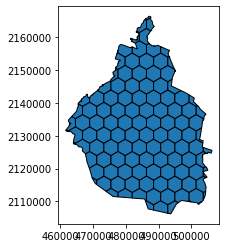

In [654]:
ax=hexgrid(cdmx,5000).plot(ec='k')
#cdmx.plot(ax=ax,alpha=.5,color='red')

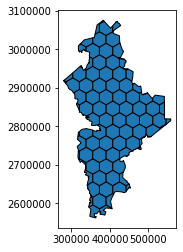

In [653]:
ax=hexgrid(nl,40000).plot(ec='k')
#nl.plot(ax=ax,alpha=.5,color='red')

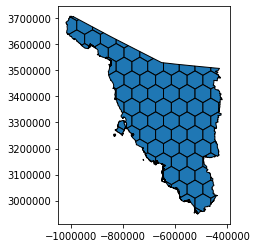

In [656]:
ax=hexgrid(son,70000).plot(ec='k')
#son.plot(ax=ax,alpha=.5,color='red')

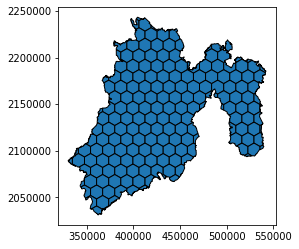

In [687]:
hexgrid(ed,15000).plot(ec='k')

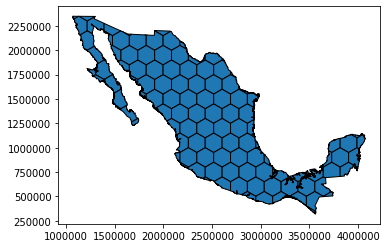

In [679]:
hexgrid(lnm,200000).plot(ec='k')